In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [8]:
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

training accuracy: 0.9992927509480147 
testing accuracy: 0.9991573329588147 
training recall: 0.6695156695156695 
testing recall: 0.6382978723404256 
training precision: 0.9038461538461539 
testing precision: 0.8108108108108109 
training f1: 0.7692307692307692 
testing f1: 0.7142857142857143


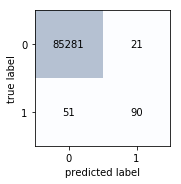

In [15]:
target = "Class"
y = df[target]
X = df.loc[:,"V1":"V28"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1234)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_test_prob = pipe.predict_proba(X_test)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred),
      "\ntesting accuracy:", metrics.accuracy_score(y_test, y_test_pred),
      "\ntraining recall:", metrics.recall_score(y_train, y_train_pred),
      "\ntesting recall:", metrics.recall_score(y_test, y_test_pred),
      "\ntraining precision:", metrics.precision_score(y_train, y_train_pred),
      "\ntesting precision:", metrics.precision_score(y_test, y_test_pred),
      "\ntraining f1:", metrics.f1_score(y_train, y_train_pred),
      "\ntesting f1:", metrics.f1_score(y_test, y_test_pred)
     )

Text(0.5,1,'ROC, auc: 0.9731921179169678')

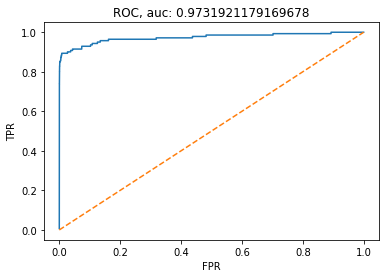

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: "+ str(metrics.auc(fpr, tpr)))

Text(0.5,1,'Precision Recall Curve, \navg precision score: 0.7440676161533074')

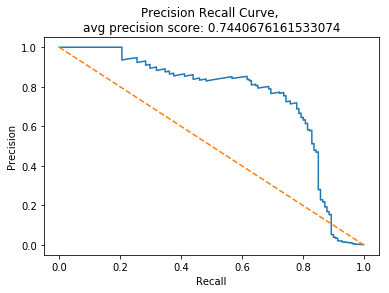

In [26]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_test_prob[:, 1])
plt.plot(recall, precision)
plt.plot([0, 1], [1, 0], ls = "--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve, \navg precision score: "+ str(metrics.average_precision_score(y_test, y_test_prob[:, 1])))